# 🧬 Breed & Battle Royale for Rare Event Detection
This notebook runs a generational tournament to find the best resampling strategy for rare event classification.

In [36]:
import pandas as pd
import sys, os
sys.path.insert(0, os.path.abspath("../src"))

from model_eval import evaluate_model
from breed_and_battle import breed_and_battle
from resampling import (
    manual_upsampling, smote, adasyn, borderline_smote,
    smote_tomek, smote_enn, random_undersample, cluster_centroids
)
from preprocessing import load_and_prepare_data, split_and_scale, select_top_features
from visualization import print_champion_summary, plot_pr_auc_tracking
from resampling_registry import get_resamplers

## 📦 Load & Prepare Data

In [39]:
data_path = "../data/synth_rare_event_data.csv"
target_col = "rare_event"

X, y = load_and_prepare_data(data_path, target_col)
X_train_scaled, X_test_scaled, y_train, y_test = split_and_scale(X, y)
X_train, X_test, _ = select_top_features(X_train_scaled, y_train, X_test_scaled, return_features=True)


In [41]:
df = pd.read_csv(data_path)

# 🧮 Compute baseline (random guessing PR AUC)
positive_rate = df["rare_event"].mean()
print(f"📉 Baseline PR AUC (random guessing): {positive_rate:.3f}")

📉 Baseline PR AUC (random guessing): 0.018


## 🧪 Resampling Strategies

In [32]:
# 📊 Load resampling strategies via registry
resamplers = get_resamplers(X_train, y_train, target_col)
resampled_datasets = {name: fn() for name, fn in resamplers.items()}

## ⚔️ Run the Evolutionary Tournament

In [23]:
population = breed_and_battle(
    resampled_datasets=resampled_datasets,
    X_test=X_test,
    y_test=y_test,
    generations=10,
    top_k=3,
    debug=True
)



🎬 Initial Fighters Enter the Arena!


/Users/sophiaboettcher/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



🎮 Generation 1 Begins!
-------------------------
🏆 Top Performers:
1. Cluster Centroids_G0: PR AUC = 0.043
2. Manual Upsampling_G0: PR AUC = 0.035
3. Random Undersample_G0: PR AUC = 0.032

💘 Cluster Centroids breeds 2 children

👊 Cluster Centroids_child_1_G1 marches in with fire!
📍 Style: Cluster Centroids
🧬 Genome: C = 1.07, l1_ratio = 0.49
🔁 Generation: 1
🏆 Last Score: PR AUC = 0.042
🧬 Lineage: child of Cluster Centroids_G0

👊 Cluster Centroids_child_2_G1 throws their gloves into the arena!
📍 Style: Cluster Centroids
🧬 Genome: C = 1.00, l1_ratio = 0.52
🔁 Generation: 1
🏆 Last Score: PR AUC = 0.043
🧬 Lineage: child of Cluster Centroids_G0

💘 Manual Upsampling breeds 2 children

👊 Manual Upsampling_child_1_G1 joins the fray!
📍 Style: Manual Upsampling
🧬 Genome: C = 1.05, l1_ratio = 0.42
🔁 Generation: 1
🏆 Last Score: PR AUC = 0.035
🧬 Lineage: child of Manual Upsampling_G0

👊 Manual Upsampling_child_2_G1 steps into the light!
📍 Style: Manual Upsampling
🧬 Genome: C = 1.00, l1_ratio = 0.46

## 🏁 Final Champion Summary

In [26]:
final_results = sorted(population, key=lambda x: x["score"]["pr_auc"], reverse=True)
print_champion_summary(final_results[0])



🏆 GRAND CHAMPION 🏆
👑 Name: Cluster Centroids_G5
🔁 Generation: 5
🧬 Genome: C = 0.98, l1_ratio = 0.50
📈 PR AUC: 0.043
🎖 ROC AUC: 0.639
🧬 Lineage: child of Cluster Centroids_G4


## 📊 PR AUC Over Generations

/Users/sophiaboettcher/Param_IndianMutualFunds/A2_DataPreprocessing/rare_event_project/src/visualization.py:36: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/Users/sophiaboettcher/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


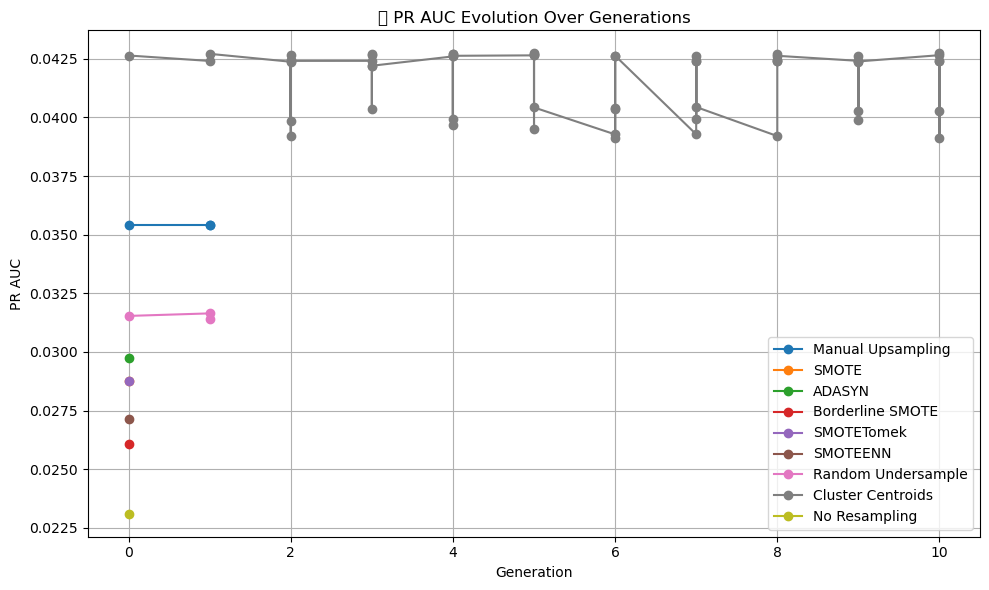

In [30]:
plot_pr_auc_tracking(population)